In [1]:
library('markovchain')

# define markov chain for market regimes
regimes <- new('markovchain', 
               states = c('0', '1'), 
               transitionMatrix = matrix(c(0.8, 0.2,
                                           0.3, 0.7), 2, 2, byrow=TRUE),
               name='RegimeSwitch')

Package:  markovchain
Version:  0.8.5-2
Date:     2020-09-07
BugReport: https://github.com/spedygiorgio/markovchain/issues




In [2]:
# regime 0 is a 'low volatility' regime, regime 1 is a 'high volatility' regime
regimes

RegimeSwitch 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 0, 1 
 The transition matrix  (by rows)  is defined as follows: 
    0   1
0 0.8 0.2
1 0.3 0.7


In [3]:
# simulate regime switches
sampleRegime <- rmarkovchain(n=120, object=regimes, t0='0')

[1] "0" "1" "1" "0" "0" "0" "0" "0" "0" "0" "0" "1" "0" "1" "1" "0" "0" "1"
 [19] "1" "1" "0" "0" "0" "0" "0" "0" "0" "1" "0" "0" "0" "0" "0" "0" "1" "0"
 [37] "0" "0" "1" "1" "1" "1" "0" "1" "0" "1" "1" "0" "0" "0" "1" "1" "1" "1"
 [55] "1" "1" "1" "0" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "0" "0" "0" "0"
 [73] "1" "1" "1" "1" "1" "1" "0" "0" "0" "1" "1" "0" "1" "1" "0" "0" "1" "1"
 [91] "1" "0" "0" "0" "0" "0" "0" "0" "0" "1" "1" "0" "0" "1" "1" "1" "0" "0"
[109] "0" "0" "0" "0" "0" "0" "1" "1" "1" "0" "0" "0"

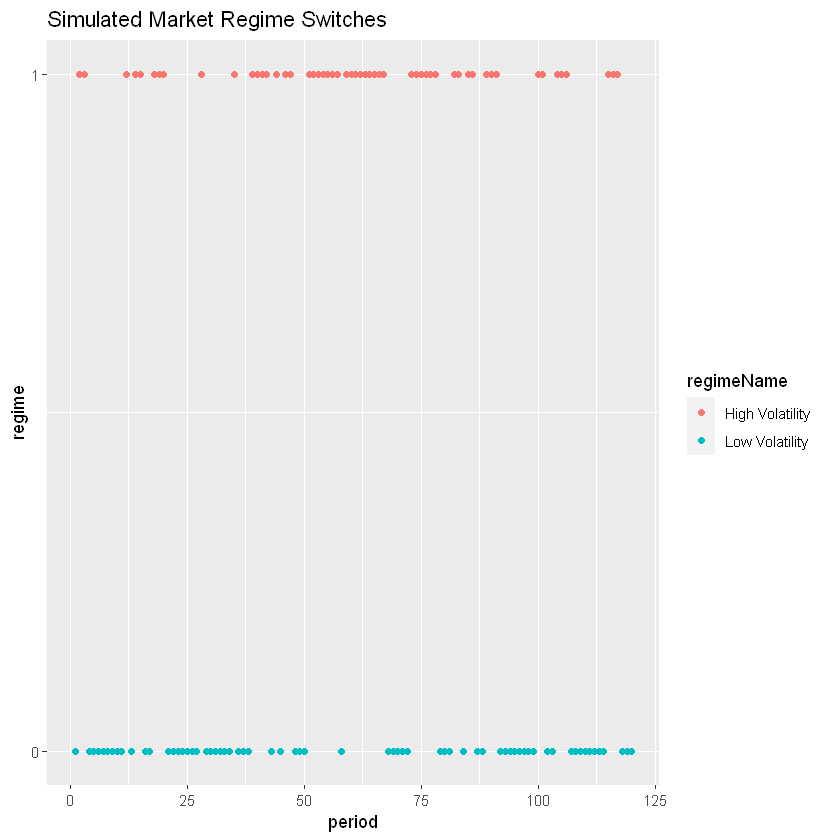

In [4]:
# plot the regime switches
df <- data.frame(period=1:120, 
                 regime=as.numeric(sampleRegime), 
                 regimeName=as.factor(ifelse(sampleRegime=='0', 'Low Volatility', 'High Volatility')),
                 mrp=rep(0,120),
                 smb=rep(0,120),
                 hml=rep(0,120))
sampleRegime

library(ggplot2)

p <- (ggplot(df) + 
      geom_point(mapping=aes(x=period, y=regime, colour=regimeName)) + 
      labs(title='Simulated Market Regime Switches') +
      scale_y_continuous(breaks=c(0,1))
     )

p

In [5]:
library(MASS)

# mean and covariance matrices for low volatility regime (0)
mu0 <- c(0.10, 0.019, 0.026)
sigma0 <- matrix(c(0.0144, 0.00175, -0.000600,
                   0.00175, 0.00537, -0.000370,
                   -0.000600, -0.000370, 0.00508), 3, 3, byrow=TRUE)

# mean and covariance matrices for high volatility regime (1)
mu1 <- c(0.0040, 0.0310, 0.150)
sigma1 <- matrix(c(0.101, 0.0231, 0.0196,
                   0.0231, 0.0387, 0.00585,
                   0.0196, 0.00585, 0.0452), 3, 3, byrow=TRUE)


# simulate factors as a multivariate normal distribution conditioned on regimes
n0 <- nrow(df[df$regime==0,])
n1 <- 120 - n0

df[df$regime==0,][,c('mrp', 'smb', 'hml')] <- mvrnorm(n=n0, mu=mu0, Sigma=sigma0)
df[df$regime==1,][,c('mrp', 'smb', 'hml')] <- mvrnorm(n=n1, mu=mu1, Sigma=sigma1)

head(df,20)

,period,regime,regimeName,mrp,smb,hml
,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,1,0,Low Volatility,0.036375992,0.18330527,0.009807682
2,2,1,High Volatility,-0.007027288,0.11146076,-0.066323909
3,3,1,High Volatility,-0.020924587,0.25700416,-0.017613504
4,4,0,Low Volatility,0.165770713,-0.05539058,-0.010676344
5,5,0,Low Volatility,-0.024865562,0.04425650,0.034018862
6,6,0,Low Volatility,0.047413778,0.06721091,-0.020243420
7,7,0,Low Volatility,0.071379152,-0.08083119,-0.055199596
8,8,0,Low Volatility,-0.010067201,-0.02508647,0.065694993
9,9,0,Low Volatility,0.270711583,0.03858093,0.017653905


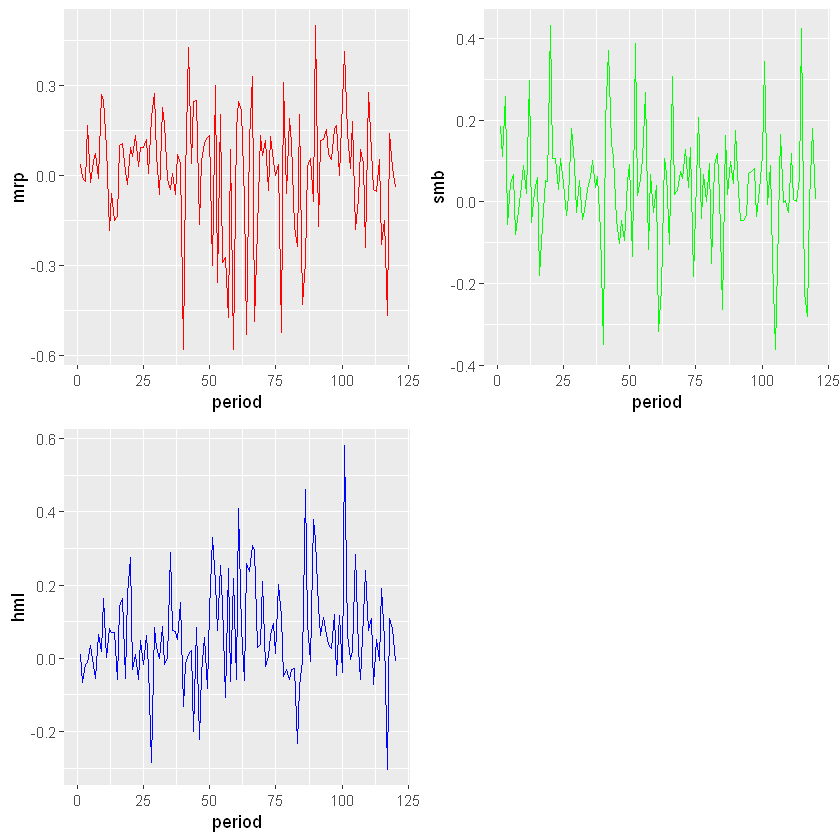

In [6]:
# plot the factors
library(gridExtra)

p1 <- (ggplot(df) + 
       geom_line(mapping=aes(x=period, y=mrp), colour='red')
       )

p2 <- (ggplot(df) + 
       geom_line(mapping=aes(x=period, y=smb), colour='green')
       )

p3 <- (ggplot(df) + 
       geom_line(mapping=aes(x=period, y=hml), colour='blue')
       )

grid.arrange(p1, p2, p3, ncol=2)

In [7]:
# save the simulated factors in a csv file
write.csv(df, 'factors.csv', row.names=FALSE)